In [136]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd

# part_1

# Boston House Prices dataset
ds = datasets.load_boston()

# dir(ds) # ['DESCR', 'data', 'feature_names', 'filename', 'target']
# ds.feature_names # ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

X = ds.data
y = ds.target

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=42)

lr = linear_model.LinearRegression()

reg = lr.fit(X_train, Y_train)
# [reg.coef_, reg.intercept_]
# score = reg.score(X_test, Y_test)

Y_predict = reg.predict(X_test)

sqerr = mean_squared_error(Y_test, Y_predict)
# sqerr = 22.0986

R2 = r2_score(Y_test, Y_predict)
# R2 = 0.6844

# part_2

regr = RandomForestRegressor(max_depth=12, random_state=42, n_estimators=1000)

reg2 = regr.fit(X_train, Y_train)
Y2_predict = reg2.predict(X_test)

R2 = r2_score(Y_test, Y2_predict)
# R2 = 0.8563




In [140]:
importance_flags = reg2.feature_importances_

importance_flags_sum = sum(importance_flags)

n1 = np.argmax(importance_flags)
v1 = importance_flags[n1]
importance_flags[n1] = 0
n2 = np.argmax(importance_flags)
v2 = importance_flags[n2]

print("importance_flags_sum:", importance_flags_sum, ",", n1, ":", v1, ",", n2, ":", v2)

# reg2.feature_importances_??
# %lsmagic

importance_flags_sum: 1.0 , 5 : 0.43816835027488954 , 12 : 0.38186311951819085


In [141]:
df = pd.read_csv("./data/creditcard.csv")

In [142]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

pd.options.display.max_columns = 100

df['Class'].value_counts(normalize=True)
# 0    0.998273
# 1    0.001727


X = df[df.columns[df.columns != 'Class']]
Y = df["Class"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=100, stratify=Y)

parameters = [{
    'n_estimators': [10, 15], 
    'max_features': np.arange(3, 5),
    'max_depth': np.arange(4, 7)
}]

clf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=100), 
    param_grid=parameters,
    scoring='roc_auc',
    cv=3
)

clf.fit(X_train, Y_train)

clf.best_params_
# GridSearchCV(cv=3, error_score='raise-deprecating',
#        estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#             max_depth=None, max_features='auto', max_leaf_nodes=None,
#             min_impurity_decrease=0.0, min_impurity_split=None,
#             min_samples_leaf=1, min_samples_split=2,
#             min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
#             oob_score=False, random_state=100, verbose=0, warm_start=False),
#        fit_params=None, iid='warn', n_jobs=None,
#        param_grid=[{'n_estimators': [10, 15], 'max_features': array([3, 4]), 'max_depth': array([4, 5, 6])}],
#        pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
#        scoring='roc_auc', verbose=0)
# {'max_depth': 6, 'max_features': 3, 'n_estimators': 15}

0    0.998273
1    0.001727
Name: Class, dtype: float64

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [10, 15], 'max_features': array([3, 4]), 'max_depth': array([4, 5, 6])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

{'max_depth': 6, 'max_features': 3, 'n_estimators': 15}

In [148]:
Y_predict = clf.predict_proba(X_test)
y_pred_proba = Y_predict[:, 1]

AUC = roc_auc_score(Y_test, y_pred_proba)
# AUC = 0.9462

<Figure size 720x576 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC curve')

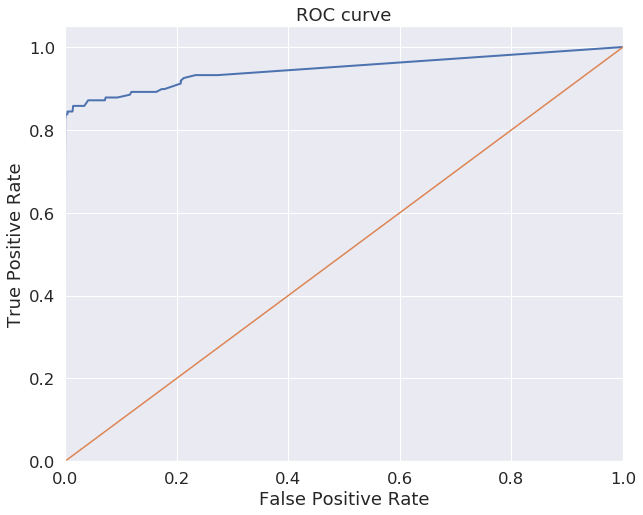

In [155]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt
import seaborn as sns

fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba, pos_label=1)

sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()